### K Mean Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline 

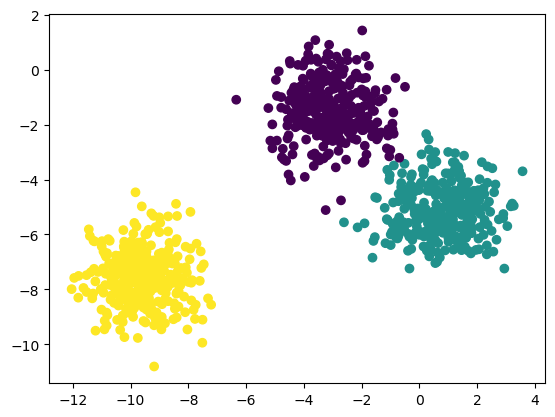

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
X[:5]

array([[ 0.56978954, -5.43260245],
       [-9.0445745 , -8.44383553],
       [ 1.00188567, -3.79740484],
       [ 0.15229866, -3.82005505],
       [-2.45800669, -1.89429155]])

In [4]:
y[:5]

array([1, 2, 1, 1, 0])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
# elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [8]:
wcss

[1340.0000000000005,
 417.33667098138255,
 123.91994114283597,
 101.80348769047404,
 83.10407605297732,
 67.45854890863944,
 60.453435212826705,
 55.651865992780955,
 49.58245877545007,
 44.8455371107382]

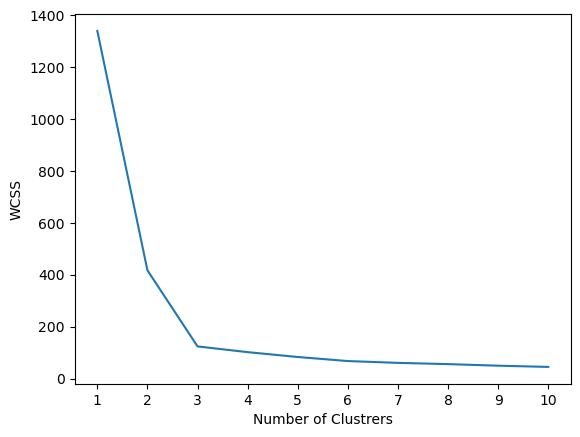

In [9]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [11]:
kmeans.fit_predict(X_train_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2,
       0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2,

In [12]:
y_pred=kmeans.predict(X_test_scaled)

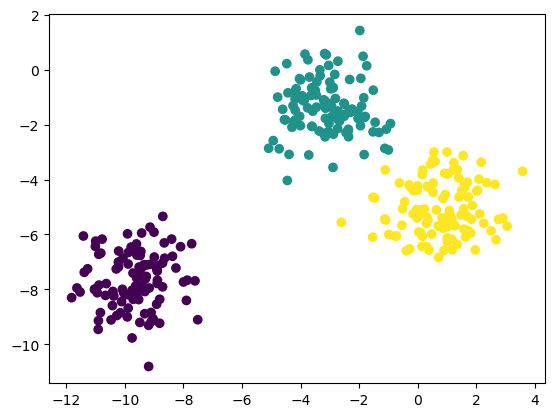

In [13]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [14]:
# kneelocator # silhote scoring ---> find the best k
# kmode k prototypes ---> categorical data , numerical+categorical data

### Heirarchial Clustering

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [19]:
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data)
iris_data.columns=iris.feature_names
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(iris_data)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

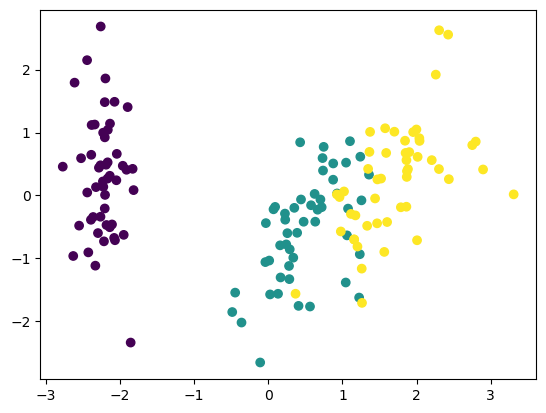

In [22]:
pca=PCA(n_components=2)
pca_scaled=pca.fit_transform(X_scaled)
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

In [24]:
pca_scaled[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Text(0, 0.5, 'Eucledian Distance')

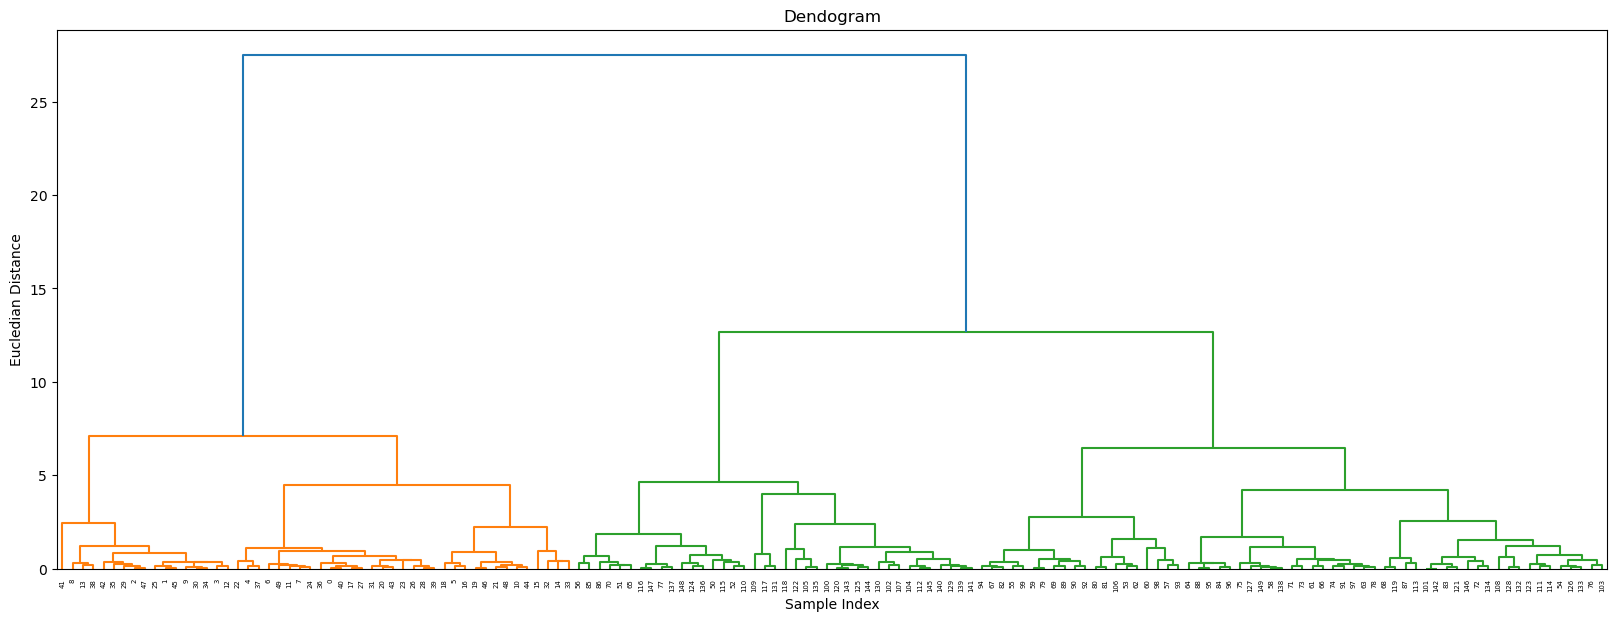

In [29]:
# select line --> longest vertical line such that no horizontal line crosses it
# dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [41]:
cluster = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean',linkage='ward')
cluster.fit_predict(pca_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

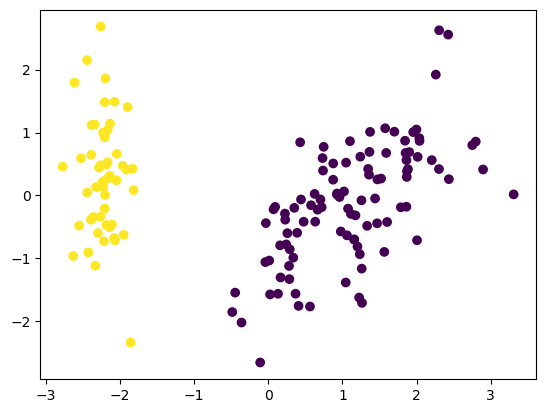

In [38]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [52]:
silhouette_coefficients = []
for n_clusters in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(pca_scaled)
    silhouette_avg = silhouette_score(pca_scaled, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in ver

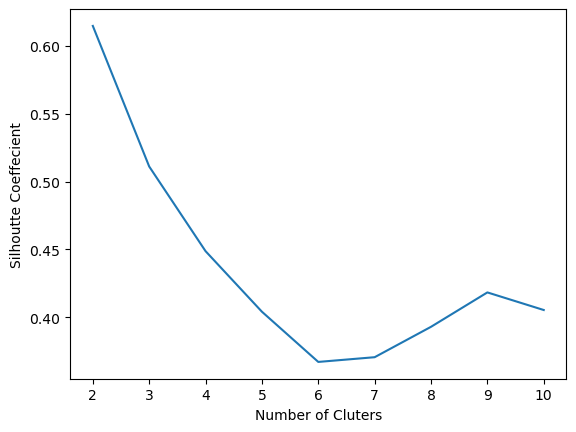

In [53]:
## more close to 1 better the clustering
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

##### DBScan

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [43]:
X,y=make_moons(n_samples=250,noise=0.05)

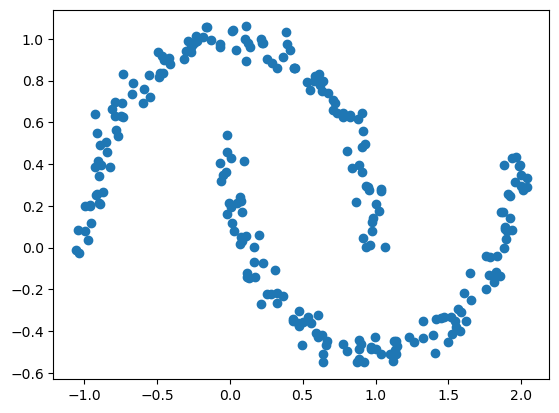

In [45]:
plt.scatter(X[:,0],X[:,1])

In [47]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [48]:
dbcan=DBSCAN(eps=0.3)
dbcan.fit(X_scaled)

DBSCAN(eps=0.3)

In [49]:
dbcan.labels_

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0])

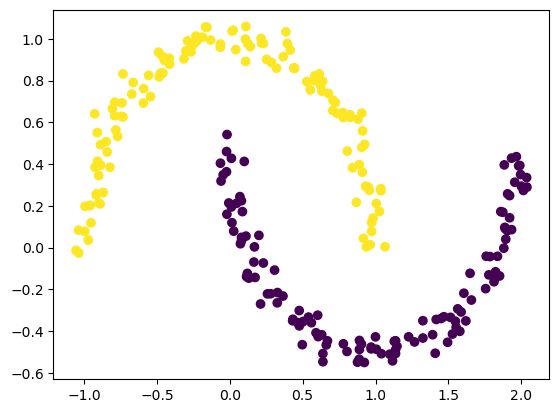

In [50]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)